In [1]:
from qiskit import *
from qiskit.visualization import *
from math import pi, sqrt

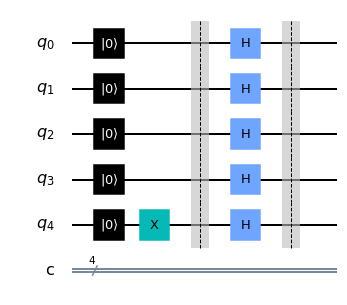

In [16]:
# n = int(input('Enter number of required qubits: '))
n = 4 

circuit = QuantumCircuit(n+1, n)    # Add one for ancillia qubit

circuit.reset(range(n+1))
circuit.x(n)
circuit.barrier()

circuit.h(range(n+1))
circuit.barrier()

# target_binary = "{0:04b}".format(target)
# print(target_binary)

# for index, value in enumerate(target_binary):  
#     if value == '0':
#         circuit.x(index)

# circuit.barrier()
# circuit.h(range(n))

circuit.draw('mpl')